# Deep Learning with Convolutional Neural Networks

## (Book: Artificial Intelligence with Python)

## Building a perceptron-based linear regressor

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

Instructions for updating:
non-resource variables are not supported in the long term


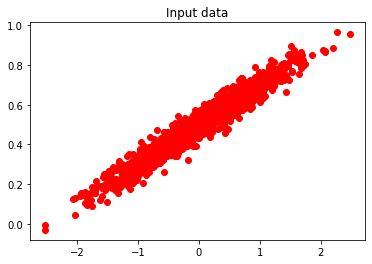

In [2]:
#Define number of points to generate
num_points = 1200
data = []
m = 0.2
c = 0.5
for i in range(num_points):
  # Generate x
  x = np.random.normal(0.0, 0.8)
  # Generate some noise
  noise = np.random.normal(0.0, 0.04)
  #compute y
  y = m * x + c + noise
  data.append([x, y])

# Separate x and y
x_data = [d[0] for d in data]
y_data = [d[1] for d in data]

# Plot generated data
plt.plot(x_data, y_data, 'ro')
plt.title('Input data')
plt.show()

In [3]:
# Generate weights and biases
W = tf.Variable(tf.random.uniform([1], -1.0, 1.0))
b = tf.Variable(tf.zeros([1]))

# Define equation for y
y = W * x_data + b

In [4]:
# Define how to compute the loss
loss = tf.reduce_mean(tf.square(y - y_data))

# Define the gradient descent optimizer
optimizer = tf.train.GradientDescentOptimizer(0.5)
train = optimizer.minimize(loss)

In [5]:
# Initialize all variables
init = tf.initialize_all_variables()

# Start tensorflow session and run it
sess = tf.Session()
sess.run(init)

Instructions for updating:
Use `tf.global_variables_initializer` instead.



ITERATION 1
W = -0.0726656
b = 0.5004831
loss = 0.046421655


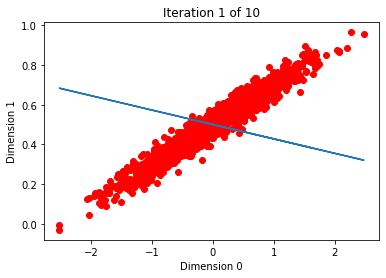


ITERATION 2
W = 0.092867
b = 0.49996078
loss = 0.008339133


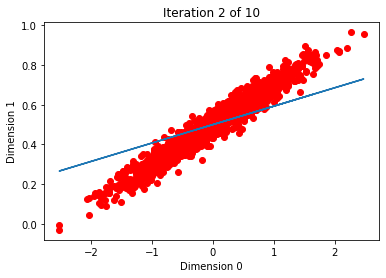


ITERATION 3
W = 0.15739268
b = 0.49975792
loss = 0.0025525303


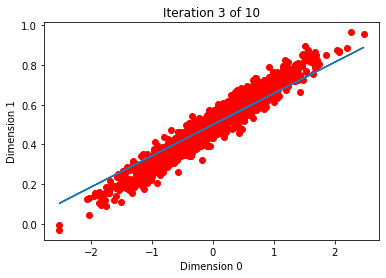


ITERATION 4
W = 0.1825452
b = 0.49967885
loss = 0.0016732623


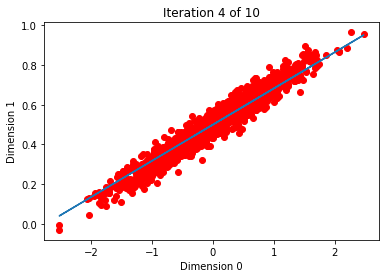


ITERATION 5
W = 0.1923498
b = 0.49964803
loss = 0.0015396582


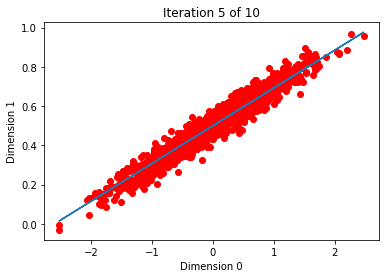


ITERATION 6
W = 0.19617172
b = 0.499636
loss = 0.0015193573


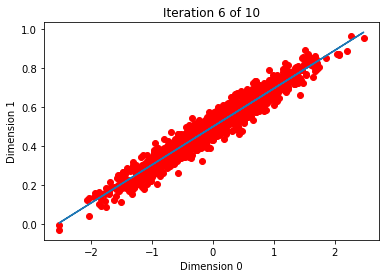


ITERATION 7
W = 0.19766152
b = 0.49963132
loss = 0.0015162725


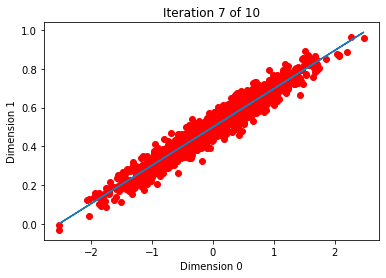


ITERATION 8
W = 0.19824225
b = 0.4996295
loss = 0.0015158037


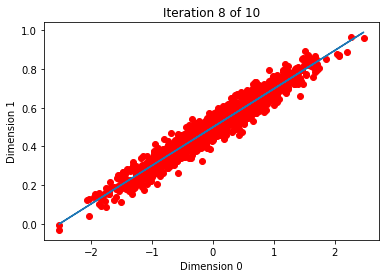


ITERATION 9
W = 0.19846863
b = 0.49962878
loss = 0.0015157327


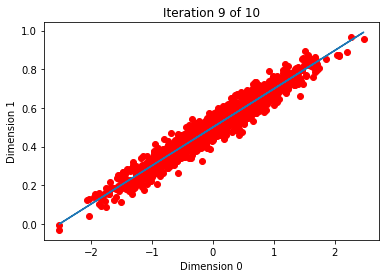


ITERATION 10
W = 0.19855687
b = 0.4996285
loss = 0.0015157218


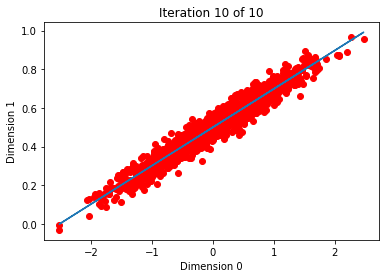

In [6]:
# Start iterating
num_iterations = 10
for step in range(num_iterations):
    # Run session
    sess.run(train)

    # Print progress
    print('\nITERATION', step+1)
    print('W =', sess.run(W)[0])
    print('b =', sess.run(b)[0])
    print('loss =', sess.run(loss))

    # Plot input data 
    plt.plot(x_data, y_data, 'ro')

    # Plot predicted output line
    plt.plot(x_data, sess.run(W) * x_data + sess.run(b))

    # Set plotting parameters
    plt.xlabel('Dimension 0')
    plt.ylabel('Dimension 1')
    plt.title('Iteration ' + str(step+1) + ' of ' + str(num_iterations))
    plt.show()

## Building an image classifier using a single layer neural network

In [7]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly
import plotly.express as px
from mpl_toolkits.mplot3d import Axes3D

In [8]:
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0


11501568/11490434 [==============================] - 0s 0us/step


In [9]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation= 'relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10, activation='softmax')
])

In [10]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [11]:
fitted_model = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=10)

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
59840/60000 [============================>.] - ETA: 0s - loss: 0.2922 - acc: 0.9151

/usr/local/lib/python3.7/dist-packages/keras/engine/training_v1.py:2057: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates = self.state_updates


60000/60000 [==============================] - 10s 173us/sample - loss: 0.2919 - acc: 0.9152 - val_loss: 0.1343 - val_acc: 0.9613
Epoch 2/10
60000/60000 [==============================] - 4s 66us/sample - loss: 0.1429 - acc: 0.9582 - val_loss: 0.1008 - val_acc: 0.9695
Epoch 3/10
60000/60000 [==============================] - 4s 66us/sample - loss: 0.1086 - acc: 0.9672 - val_loss: 0.0841 - val_acc: 0.9751
Epoch 4/10
60000/60000 [==============================] - 4s 66us/sample - loss: 0.0895 - acc: 0.9721 - val_loss: 0.0806 - val_acc: 0.9759
Epoch 5/10
60000/60000 [==============================] - 4s 66us/sample - loss: 0.0778 - acc: 0.9753 - val_loss: 0.0764 - val_acc: 0.9764
Epoch 6/10
60000/60000 [==============================] - 4s 66us/sample - loss: 0.0664 - acc: 0.9788 - val_loss: 0.0686 - val_acc: 0.9798
Epoch 7/10
60000/60000 [==============================] - 4s 66us/sample - loss: 0.0602 - acc: 0.9809 - val_loss: 0.0698 - val_acc: 0.9786
Epoch 8/10
60000/60000 [============

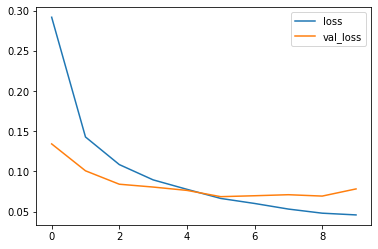

In [12]:
plt.plot(fitted_model.history['loss'], label= 'loss')
plt.plot(fitted_model.history['val_loss'], label= 'val_loss')
plt.legend()

In [13]:
print(model.evaluate(x_test, y_test))

[0.07826966183197219, 0.9792]


/usr/local/lib/python3.7/dist-packages/keras/engine/training_v1.py:2079: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,


Confusion matrix without normalization
[[ 972    1    0    1    0    1    2    1    2    0]
 [   0 1127    2    1    0    0    2    0    3    0]
 [   4    0 1011    0    3    0    2   11    1    0]
 [   1    0    5  989    0    4    0    6    3    2]
 [   1    0    4    0  962    0    3    3    1    8]
 [   2    0    0    8    1  867    6    1    6    1]
 [   6    3    1    1    4    1  941    0    1    0]
 [   1    6    9    1    0    0    0 1009    0    2]
 [   5    1    3    6    6    4    2   10  935    2]
 [   1    2    1    4    7    2    0   10    3  979]]


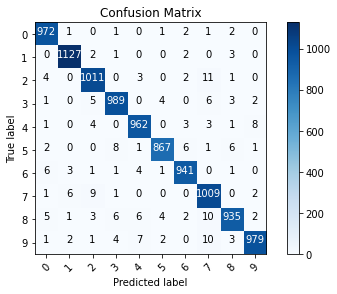

In [14]:
from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize = False,
                          title="Confusion Matrix",
                          cmap = plt.cm.Blues):
  
  """
  This function prints and plots the confusion matrix.
  Normalize can be applied by setting 'normalize = True'
  """
  
  if normalize:
    cm = cm.astype('float') / cm.sum(axis=1)[:,np.newaxis]
    print("Normalized Confusion Matrix")
  
  else:
    print("Confusion matrix without normalization")
  
  print(cm)

  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)

  fmt = '.2f' if normalize else 'd'
  thresh = cm.max() / 2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, format(cm[i, j], fmt),
             horizontalalignment = 'center',
             color = "white" if cm[i, j] > thresh else "black")
    
  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.show()

p_test = model.predict(x_test).argmax(axis=1)
cm = confusion_matrix(y_test, p_test)
plot_confusion_matrix(cm, list(range(10)))

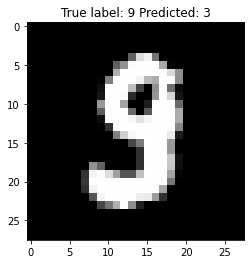

In [15]:
misclassified_idx = np.where(p_test != y_test)[0]
i = np.random.choice(misclassified_idx)
plt.imshow(x_test[i], cmap= 'gray')
plt.title("True label: %s Predicted: %s" % (y_test[i], p_test[i]));

## Building an image classifier using a Convolution Neural Network

In [16]:
mnist = tf.keras.datasets.mnist.load_data(path="mnist.npz")
(x_train, y_train), (x_test, y_test) = mnist

In [17]:
print("X_train Shape: ", x_train.shape)
print("X_Test Shape: ", x_test.shape)

X_train Shape:  (60000, 28, 28)
X_Test Shape:  (10000, 28, 28)


In [18]:
def get_weights(shape):
    data = tf.truncated_normal(shape, stddev=0.1)
    return tf.Variable(data)

def get_biases(shape):
    data = tf.constant(0.1, shape=shape)
    return tf.Variable(data)

def create_layer(shape):
    # Get the weights and biases 
    W = get_weights(shape)
    b = get_biases([shape[-1]])

    return W, b

def convolution_2d(x, W):
    return tf.nn.conv2d(x, W, strides=[1, 1, 1, 1], 
            padding='SAME')

def max_pooling(x):
    return tf.nn.max_pool(x, ksize=[1, 2, 2, 1], 
            strides=[1, 2, 2, 1], padding='SAME')

In [19]:
x_train = x_train / 255
x_test = x_test / 255

In [20]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(10, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=30)

Train on 60000 samples
Epoch 1/30
60000/60000 [==============================] - 4s 69us/sample - loss: 0.2673 - acc: 0.9230
Epoch 2/30
60000/60000 [==============================] - 3s 54us/sample - loss: 0.1220 - acc: 0.9633
Epoch 3/30
60000/60000 [==============================] - 3s 55us/sample - loss: 0.0840 - acc: 0.9744
Epoch 4/30
60000/60000 [==============================] - 3s 54us/sample - loss: 0.0637 - acc: 0.9806
Epoch 5/30
60000/60000 [==============================] - 3s 55us/sample - loss: 0.0509 - acc: 0.9846
Epoch 6/30
60000/60000 [==============================] - 3s 54us/sample - loss: 0.0398 - acc: 0.9880
Epoch 7/30
60000/60000 [==============================] - 3s 54us/sample - loss: 0.0326 - acc: 0.9895
Epoch 8/30
60000/60000 [==============================] - 3s 54us/sample - loss: 0.0271 - acc: 0.9916
Epoch 9/30
60000/60000 [==============================] - 3s 54us/sample - loss: 0.0224 - acc: 0.9933
Epoch 10/30
60000/60000 [==============================] - 

In [21]:
model.evaluate(x_test,y_test)

/usr/local/lib/python3.7/dist-packages/keras/engine/training_v1.py:2057: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates = self.state_updates


[0.14036621844856667, 0.9762]

In [22]:
x_train = x_train.reshape(-1,28,28,1)
x_train.shape

(60000, 28, 28, 1)

In [23]:
x_test = x_test.reshape(-1,28,28,1)
x_test.shape

(10000, 28, 28, 1)

In [24]:
model = tf.keras.Sequential([
    
    tf.keras.layers.Conv2D(30, (3,3), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D((2,2)),
 
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(10, activation='sigmoid')
])

In [25]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=5)

Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 13s 209us/sample - loss: 0.1668 - acc: 0.9506
Epoch 2/5
60000/60000 [==============================] - 4s 71us/sample - loss: 0.0558 - acc: 0.9831
Epoch 3/5
60000/60000 [==============================] - 4s 71us/sample - loss: 0.0359 - acc: 0.9887
Epoch 4/5
60000/60000 [==============================] - 5s 83us/sample - loss: 0.0238 - acc: 0.9927
Epoch 5/5
60000/60000 [==============================] - 4s 71us/sample - loss: 0.0160 - acc: 0.9948


In [26]:
y_train[:5]

array([5, 0, 4, 1, 9], dtype=uint8)

In [27]:
model.evaluate(x_test, y_test)

[0.05150511331007292, 0.9846]